# EDA ON FIFA WORLDCUP 
for more detail about data set [please visit](https://www.kaggle.com/datasets/jahaidulislam/fifa-world-cup-all-goals-1930-2022-dataset) 

In [1]:
# import all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import charset_normalizer
%matplotlib inline 

* import data set
1) as data set not on UTF-8 so first we have to find which encoding use by data set  for this purpose we use charset_normalize library, let see how it works

In [2]:
with open('FIFA World Cup All Goals 1930-2022.csv','rb') as rawdata:
    print(charset_normalizer.detect(rawdata.read(1000)))

{'encoding': 'windows-1250', 'language': 'Dutch', 'confidence': 1.0}


The output is `{'encoding': 'windows-1250', 'language': 'Dutch', 'confidence': 1.0}`, so we found that the data set use 'windows-1250 encoding'

In [3]:
# now we import data
df=pd.read_csv('FIFA World Cup All Goals 1930-2022.csv',encoding='windows-1250',index_col='key_id')
# let see first five rows of our data to get idea
df.head()

,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
key_id,,,,,,,,,,,,,,,,,,,,,
1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,...,0,T-28,France,FRA,19',19,0,first half,0,0
2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,...,0,T-28,France,FRA,40',40,0,first half,0,0
3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,...,0,T-28,France,FRA,43',43,0,first half,0,0
4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-44,Mexico,...,0,T-44,Mexico,MEX,70',70,0,second half,0,0
5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,7/13/1930,group stage,Group 1,T-28,France,...,0,T-28,France,FRA,87',87,0,second half,0,0


* Start with data cleaning

In [129]:
# first find how many null value are there in `df` "FIFA World Cup All Goals 1930-2022.csv"
df.isnull().sum()
# hurry, there is no null value in data set
# now we can start our EDA

goal_id              0
tournament_id        0
tournament_name      0
match_id             0
match_name           0
match_date           0
stage_name           0
group_name           0
team_id              0
team_name            0
team_code            0
home_team            0
away_team            0
player_id            0
family_name          0
given_name           0
shirt_number         0
player_team_id       0
player_team_name     0
player_team_code     0
minute_label         0
minute_regulation    0
minute_stoppage      0
match_period         0
own_goal             0
penalty              0
dtype: int64

* we going to answers of below questions
* The dataset can be used to answer a wide range of research questions, such as:

1) Which team has scored the most goals in World Cup history?
2) Who is the all-time leading goal scorer in World Cup history?
3) What percentage of World Cup goals are scored in the first half versus the second half?
4) How has the frequency of certain types of goals (e.g. penalties, headers) changed over time?

In [130]:
# Question 1
most_goal_by_team=df.team_name.value_counts()
most_goal_by_team.sort_values(ascending=False)

Brazil          237
Argentina       152
France          136
West Germany    131
Italy           128
               ... 
Israel            1
Angola            1
Iraq              1
El Salvador       1
Qatar             1
Name: team_name, Length: 81, dtype: int64

Top five goal scorer team

1) Brazil          237
2) Argentina       152
3) France          136
5) West Germany    131
5) Italy           128

Text(0.5, 0, 'Countries Name')

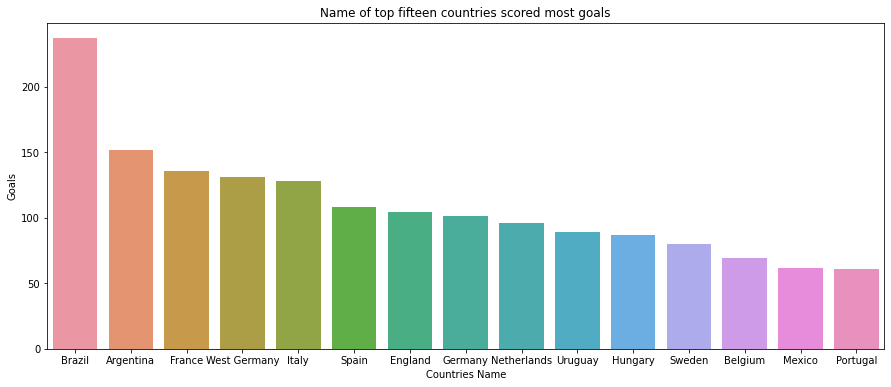

In [131]:
#let's visualized
plt.figure(figsize=(15,6))
#plot top fifteen countries
top_fifteen=df.team_name.value_counts().nlargest(15)
sns.barplot(x=top_fifteen.index,y=top_fifteen.values)
plt.title('Name of top fifteen countries scored most goals')
plt.ylabel('Goals')
plt.xlabel('Countries Name')


In [132]:
# Question 2
#top fifteen leading goal scorer
leading_goal_scorer=df.family_name.value_counts().nlargest(15)
leading_goal_scorer

Müller       29
Ronaldo      23
Klose        16
Messi        13
Fontaine     13
Mbappé       12
Pelé         12
Baggio       11
Kocsis       11
Klinsmann    11
Rodríguez    10
Cubillas     10
Batistuta    10
Rahn         10
Andersson    10
Name: family_name, dtype: int64

Text(0, 0.5, 'NO of Goals')

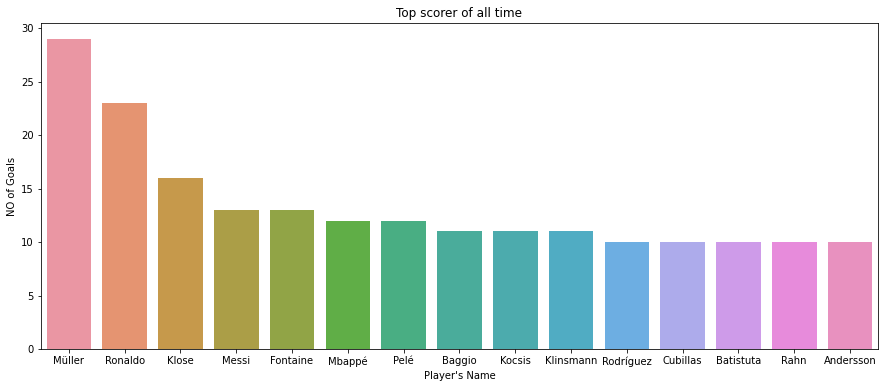

In [133]:
#let's visualized
plt.figure(figsize=(15,6))
sns.barplot(x=leading_goal_scorer.index,y=leading_goal_scorer.values)
plt.title('Top scorer of all time')
plt.xlabel('Player\'s Name')
plt.ylabel('NO of Goals')

In [134]:
#Question 3
# our goal is to find percentage first to total,we not consider extra time here
first_half=df.loc[df.match_period=='first half','match_period'].count()
sec_half=df.loc[df.match_period=='second half','match_period'].count()
total_row=df.match_period.count()
f_half_goal_per=(first_half/total_row)*100
s_half_goal_per=(sec_half/total_row)*100
print(f_half_goal_per)
s_half_goal_per


40.919117647058826


52.38970588235294